# Modelo Ciclo de Diesel

Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import diagrama_pv, diagrama_ts, LABEL_SIZE, MARKER_SIZE

## Definir funciones
Para la presión de un gas en un proceso isoentrópio (y por lo tanto adiabático), admisión de calor a presión constante y eliminación de calor a volumen constante

### Para diagrama Pv

In [2]:
# Valores dados para que calce con el gráfico
gamma = np.log(3) / np.log(5)

def pressure_adiabatic(v, P1, v1):
    return P1*np.power(v1/v, gamma)

### Para diagrama TS

In [3]:
c_v = 4 / np.log(3)
c_p = 4 / np.log(5.5/2.5)

def temperature_volume(S, T1, S1):
    return T1*np.exp((S-S1)/c_v)

def temperature_pressure(S, T1, S1):
    return T1*np.exp((S-S1)/c_p)

## Valores iniciales

In [4]:
v_a = 5
P_a = 1
v_b = 0.3
v_c = 1

S_a = 1
T_a = 1
S_d = 5
T_c = 5.5

## Cálcular otros valores

In [5]:
v_ab = np.linspace(v_a, v_b)
P_ab = pressure_adiabatic(v_ab, P_a, v_a)
P_b = pressure_adiabatic(v_b, P_a, v_a)
P_c = P_b
v_d = v_a
v_cd = np.linspace(v_c, v_d)
P_cd = pressure_adiabatic(v_cd, P_c, v_c)
P_d = pressure_adiabatic(v_d, P_c, v_c)
# Comparación Otto
v_b_otto = 1
P_b_otto = pressure_adiabatic(v_b_otto, P_a, v_a)


S_ad = np.linspace(S_a, S_d)
T_ad = temperature_volume(S_ad, T_a, S_a)
T_d = temperature_volume(S_d, T_a, S_a)
S_c = S_d
S_b = S_a
S_cb = np.linspace(S_c, S_b)
T_cb = temperature_pressure(S_cb, T_c, S_c)
T_b = temperature_pressure(S_b, T_c, S_c)
# Comparación Otto
T_cb_otto = temperature_volume(S_cb, T_c, S_c)
T_b_otto = temperature_volume(S_b, T_c, S_c)

## Graficar

### Diagrama Pv

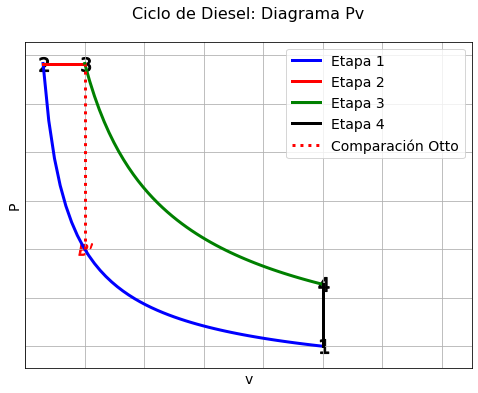

In [6]:
v = [
    v_ab,
    [v_b, v_c],
    v_cd,
    [v_d, v_a]
]
P = [
    P_ab,
    [P_b, P_c],
    P_cd,
    [P_d, P_a]
]

fig, ax = diagrama_pv(v, P, "Ciclo de Diesel", True)

ax.plot([v_b_otto, v_c], [P_b_otto, P_c], ':r', label="Comparación Otto", linewidth=3)
ax.scatter(v_b_otto, P_b_otto, marker='$B\'$', color='r', s=MARKER_SIZE)
ax.set_xlim(0, 7.5)
ax.legend(fontsize=LABEL_SIZE)

fig.savefig("../Matplotlib/ciclo_diesel_pv.png")

### Diagrama TS

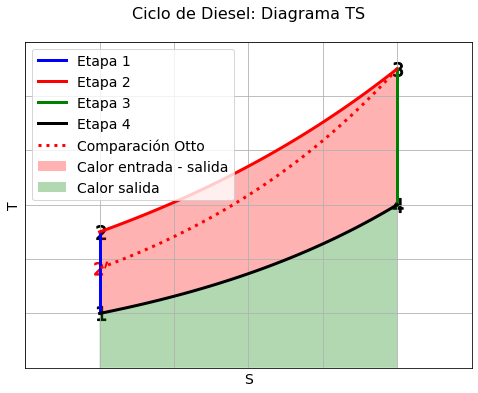

In [7]:
S = [
    [S_a, S_b],
    S_cb[::-1],
    [S_c, S_d],
    S_ad[::-1]
]
T = [
    [T_a, T_b],
    T_cb[::-1],
    [T_c, T_d],
    T_ad[::-1]
]

fig, ax = diagrama_ts(S, T, "Ciclo de Diesel", True)

ax.plot(S_cb, T_cb_otto, ':r', label="Comparación Otto", linewidth=3)

T_bc = temperature_pressure(np.linspace(S_b, S_c), T_b, S_b)

ax.fill_between(S_ad, T_ad, T_bc, facecolor='r', alpha=0.3, label="Calor entrada - salida")
ax.fill_between(S_ad, T_ad, facecolor='g', alpha=0.3, label="Calor salida")

ax.scatter(S_b, T_b_otto, marker='$2\'$', color='r', s=MARKER_SIZE)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend(fontsize=LABEL_SIZE)

fig.savefig("../Matplotlib/ciclo_diesel_ts.png")